1. Create two signals that can (e.g.) represent '0' and '1'
2. Add noise to them
3. Take the dot product of the noisy signal to the original signals
4. Cauchy-Schwartz shows how the the values of the dot product can help recover the original signals
5. Play around with the magnitude of noise added to see how much can be tolerated
6. Change the random function from uniform to normal. It's amazing what this can recover!!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import siggen as sg
import siganalysis as sa

In [2]:
c1 = sg.gen_sig_cos2(200, 4, 120)
c2 = sg.gen_sig_cos(200, 2, 120)
print("1-norms: {:.2f} {:.2f}".format(sa.norm_1(c1), sa.norm_1(c2)))
print("2-norms: {:.2f} {:.2f}".format(sa.norm_2(c1), sa.norm_2(c2)))
print("infty-norms: {:.2f} {:.2f}".format(sa.norm_infty(c1), sa.norm_infty(c2)))

1-norms: 128.74 125.56
2-norms: 10.07 9.92
infty-norms: 1.00 1.00


In [4]:
s1 = sg.gen_sig_unit_pulse(200, 10, 110)
s1 = s1/sa.norm_2(s1)

s2a = sg.gen_sig_unit_pulse(200, 10, 60)
s2b = sg.gen_sig_unit_pulse(200, 60, 110) * -1
s2 = s2a + s2b
s2 = s2/sa.norm_2(s2)

In [5]:
noisy_s1 = s1 + np.random.normal(loc=1, scale=5, size=200)
#noisy_s1 = s1 + 0.1 * np.random.random(200)
noisy_s1 /= sa.norm_2(noisy_s1)

noisy_s2 = s2 + 0.2 * np.random.random(200)
noisy_s2 /= sa.norm_2(noisy_s2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To re

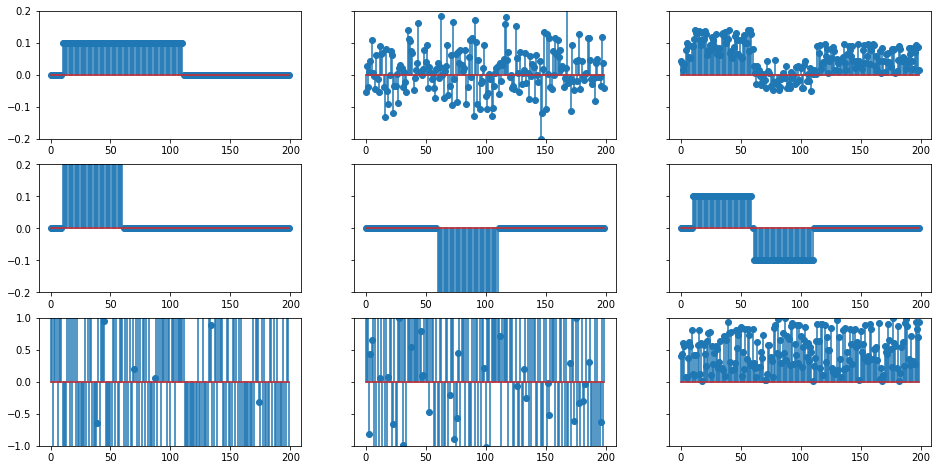

In [6]:
fig, ax = plt.subplots(3, 3, figsize=(16,8), sharey='row')
ax[0,0].set_ylim(-.2,.2)
ax[1,0].set_ylim(-.2,.2)
ax[2,0].set_ylim(-1,1)
ax[0,0].stem(s1)
ax[0,1].stem(noisy_s1)
ax[0,2].stem(noisy_s2)
ax[1,0].stem(s2a)
ax[1,1].stem(s2b)
ax[1,2].stem(s2)
r1 = np.random.normal(loc=1, scale=50, size=200)
r2 = np.random.normal(loc=1, scale=5, size=200)
r3 = np.random.random(200)
ax[2,0].stem(r1)
ax[2,1].stem(r2)
ax[2,2].stem(r3)
plt.show()

In [8]:
dp1 = np.dot(s1, noisy_s1)
dp2 = np.dot(s2, noisy_s1)
print(dp1, dp2)

dp1 = np.dot(s1, noisy_s2)
dp2 = np.dot(s2, noisy_s2)
print(dp1, dp2)

0.0917165596212198 0.02141875797629733
0.4863548002229275 0.5609640558220348
